## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [115]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

np.random.seed(113)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [116]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [117]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [118]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [119]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [120]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [121]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

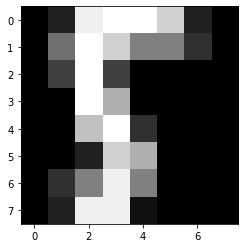

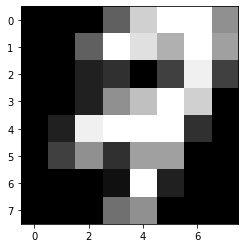

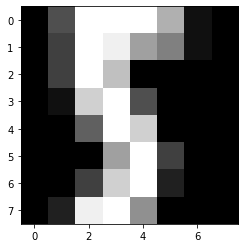

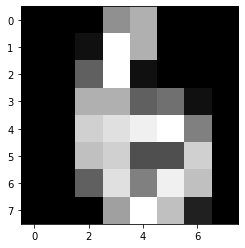

In [122]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [123]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

### Neural Net

In [124]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: total: 11.5 s
Wall time: 1.49 s


In [125]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 3.82 ms


In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        35
           2       1.00      0.97      0.99        36
           3       0.98      1.00      0.99        41
           4       0.95      1.00      0.97        38
           5       0.97      0.93      0.95        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       1.00      0.97      0.98        29
           9       0.97      1.00      0.99        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## With RandomizedSearchCV

In [127]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter= 50,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (60, 40, 20), 'alpha': 1, 'activation': 'relu'}
CPU times: total: 34.3 s
Wall time: 2min 46s
Parser   : 109 ms


In [128]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        37
           8       1.00      0.93      0.96        29
           9       1.00      0.97      0.99        34

    accuracy                           0.99       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.99      0.99      0.99       360

CPU times: total: 0 ns
Wall time: 9.15 ms


## With GridSearchCV

In [129]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (70,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 13.7 s
Wall time: 2min 32s


In [130]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       0.97      1.00      0.99        38
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       1.00      0.93      0.96        29
           9       0.94      0.94      0.94        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

CPU times: total: 0 ns
Wall time: 8.13 ms


In [131]:
print(f"The best {score_measure} score for Neural Net is {grid_search.best_score_}")

The best accuracy score for Neural Net is 0.9812112853271391


### Decision Tree 

In [132]:
%%time

dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=25, min_samples_split=20, min_samples_leaf=20)
_ = dtree.fit(X_train, y_train)

CPU times: total: 125 ms
Wall time: 20.8 ms


In [133]:
%%time
y_pred = dtree.predict(X_test)

CPU times: total: 0 ns
Wall time: 545 µs


In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.74      0.83      0.78        35
           2       0.90      0.72      0.80        36
           3       0.72      0.68      0.70        41
           4       0.82      0.74      0.78        38
           5       0.88      0.93      0.90        30
           6       0.97      0.92      0.94        37
           7       0.71      0.65      0.68        37
           8       0.71      0.86      0.78        29
           9       0.76      0.82      0.79        34

    accuracy                           0.81       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.81      0.81      0.80       360



### Decision Tree with Random Search CV

In [135]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=50,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestDTreeRand = rand_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
The best accuracy score is 0.7953953735965932
... with parameters: {'min_samples_split': 22, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0081, 'max_leaf_nodes': 99, 'max_depth': 44, 'criterion': 'gini'}


In [136]:
%%time
y_pred = bestDTreeRand.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.82      0.77      0.79        35
           2       0.83      0.81      0.82        36
           3       0.76      0.68      0.72        41
           4       0.83      0.76      0.79        38
           5       0.82      0.93      0.87        30
           6       1.00      0.92      0.96        37
           7       0.78      0.86      0.82        37
           8       0.80      0.83      0.81        29
           9       0.68      0.76      0.72        34

    accuracy                           0.82       360
   macro avg       0.83      0.83      0.82       360
weighted avg       0.83      0.82      0.83       360

CPU times: total: 0 ns
Wall time: 5.65 ms


### Decision Tree GridSearch CV

In [137]:
score_measure = "accuracy"
kfolds = 5
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestDTreeGrid = grid_search.best_estimator_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
The best accuracy score is 0.7953977932636469
... with parameters: {'criterion': 'gini', 'max_depth': 42, 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.008, 'min_samples_leaf': 3, 'min_samples_split': 20}


In [138]:
%%time
y_pred = bestDTreeGrid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.82      0.77      0.79        35
           2       0.83      0.81      0.82        36
           3       0.76      0.68      0.72        41
           4       0.83      0.76      0.79        38
           5       0.82      0.93      0.87        30
           6       1.00      0.92      0.96        37
           7       0.88      0.76      0.81        37
           8       0.80      0.83      0.81        29
           9       0.62      0.85      0.72        34

    accuracy                           0.82       360
   macro avg       0.83      0.82      0.82       360
weighted avg       0.83      0.82      0.82       360

CPU times: total: 0 ns
Wall time: 5 ms


In [139]:
print(f"The best {score_measure} score for Decision Tree is {grid_search.best_score_}")

The best accuracy score for Decision Tree is 0.7953977932636469


### Model Comparison 

- For Neural Networks the overall accuracy was 98% i.e it was able to classify 98% of the dataset correctly.
- For Decision Tree Classifiers the overall accuracy was 79% i.e it was able to classify 85% of the dataset correctly.

The Neural Net models performed better than the Decision Tree Classifiers

The reason for this is neural networks are more powerful and flexible models than decision trees. They can capture complex non-linear relationships in the data and learn representations at multiple levels of abstraction. Whereas decision trees are simpler and more interpretable models than neural networks. 

In general, neural networks are more powerful and can achieve higher accuracy, but decision trees may be more interpretable and suitable for smaller datasets.